# BL40A2010 Introduction to IoT-Based Systems

## Assignment 3, 17.01.2024

### Author: Jesse Peltola

In [1]:
#install missing libraries
! pip install --upgrade networkx
! pip install --upgrade scipy

                                              0.0/1.6 MB ? eta -:--:--
     ---                                      0.2/1.6 MB 4.6 MB/s eta 0:00:01
     -----------                              0.5/1.6 MB 6.0 MB/s eta 0:00:01
     --------------------                     0.8/1.6 MB 6.7 MB/s eta 0:00:01
     -------------------------------          1.3/1.6 MB 7.5 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 7.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**(1) Compute the following for a ring topology of $N=5$ and $N=6$  nodes considering that the network in unweighted and the links are directed. The result will give these number as a function of $N$.** ![](./ring.png) *Fig. 1 Example when $N=6$.* 

#### Answer: N=5

(a) Degree of nodes: each node has exactly 2 edges connected to it in the ring topology so it is **2**
	
(b) Adjacent matrix: 
$$A = \begin{pmatrix} 
	0 & 1 & 0 & 0 & 1  \\
	1 & 0 & 1 & 0 & 0  \\
	0 & 1 & 0 & 1 & 0  \\
    0 & 0 & 1 & 0 & 1  \\
    1 & 0 & 0 & 1 & 0  \\
\end{pmatrix}
$$

(c) Diameter: Ring topology diameter is calculated from N/2 so it is 5/2 = **2.5**


(d) Clustering coefficient of the nodes: In the ring topology, there are no triangles formed with the direct nodes. So **clustering coefficient of the nodes is 0**

#### For N = 6

(a) Degree of nodes: As mentioned earlier, it is 2

(b) Adjacent matrix: 
$$A = \begin{pmatrix} 
	0 & 1 & 0 & 0 & 0 & 1 \\
	1 & 0 & 1 & 0 & 0 & 0 \\
	0 & 1 & 0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 & 0 & 1 \\
	1 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

(c) Diameter: Ring topology diameter is calculated from N/2 so it is 6/2 = **3**


(d) Clustering coefficient of the nodes: As mentioned earlier, it is **0**



**(2) Use NetworkX to draw and analyze a ring topology with 5 nodes. Verify if the results previously obtained are valid.**

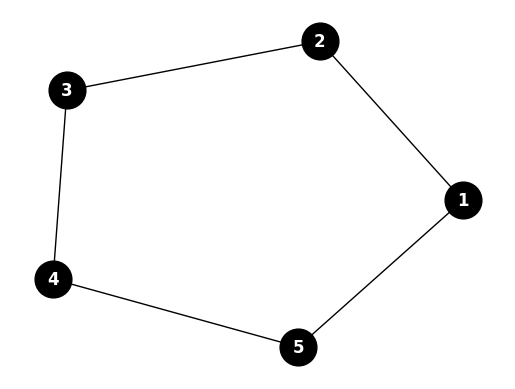

DegreeView({1: 2, 2: 2, 3: 2, 4: 2, 5: 2})

Matrix: 
[[0 1 0 0 1]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [1 0 0 1 0]] 

Diameter:  2 so it is proven wrong in 1 exercise 

Clustering coefficient  {1: 0, 2: 0, 3: 0, 4: 0, 5: 0} So it is 0


In [36]:
import networkx as nx #https://networkx.github.io/
import matplotlib.pyplot as plt #https://matplotlib.org/
import scipy as sp
import numpy as np

#Creating a graph for N=5
G = nx.Graph()

G.add_node(1)
G.add_nodes_from([2, 3, 4, 5])
G.add_edges_from([(1,2), (2, 3), (3,4), (4, 5), (5, 1)])
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

#Checking the node degree 
display(G.degree()) 

#Printing the matrix
A = nx.adjacency_matrix(G)
print("Matrix: ")
print(A.todense(), "\n")

#Diameter:
print("Diameter: ", nx.diameter(G), "so it is proven wrong in 1 exercise", "\n")

#Clustering coefficient
print("Clustering coefficient ", nx.clustering(G), "So it is 0")


**(3) Analyze the ring topology with size 15 ($N=15$) as a communication network (i.e. how data travel to a point to another in the network) based on the node degree, the network diameter and the cluster coefficient.**

Answer:

The ring topology is N = 15 as communication netwrok where each node is connected to exactly two other nodes. In this case, the degree of each node is 2. As previously mentioned, ring topology diameter is N/2 = 15/2 = 7.5 and cluster coefficient is still 0.

Data travels from one to the next in a sequential manner os each node in the ring forwards the data to the next node in the clockwise or vice versa. 

**(4) Consider the ring network from the previous question. The network performance depends on its diameter. As a designer, you can add one new node in the network (and an unlimited number of links that this node is part) . Justify your decision and evaluate how much better the network is. Generalize this finding as a function of $N$.**

*Hint:*  Follow Exercise 1 approach to generalize the finding.

Answer: The network performance depends on its diameter which means that when we add new node and it is linked with two nodes. So in this case, diameter is N/2 but we can reduce the diameter of the network by adding a new node and connecting it to existing nodes. For example, a link between Node 15 and Node 7 should be created so data can travel "faster". What more links the node has it lower diameter the network has. 

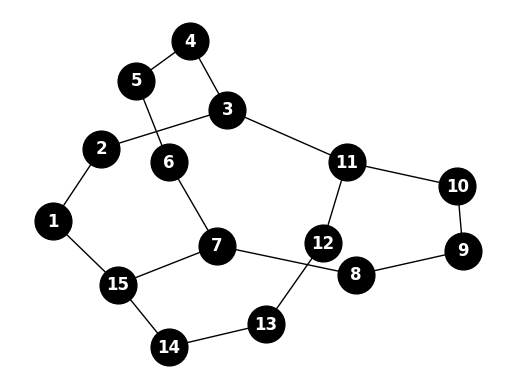

DegreeView({1: 2, 2: 2, 3: 3, 4: 2, 5: 2, 6: 2, 7: 3, 8: 2, 9: 2, 10: 2, 11: 3, 12: 2, 13: 2, 14: 2, 15: 3})

Matrix: 
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 1 0]] 

Diameter:  5 

Clustering coefficient  {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0} So it is 0


In [43]:
#Creating a graph for N=5
G.clear()
G = nx.Graph()

G.add_node(1)
G.add_nodes_from([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
G.add_edges_from([(1,2), (2, 3), (3,4), (4, 5), (5, 6), (6, 7), (7,8), (8, 9),
                  (9, 10), (10, 11), (11, 12), (12,13), (13, 14), (14, 15), (15, 1), (15, 7), (11, 3)])
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

#Checking the node degree 
display(G.degree()) 

#Printing the matrix
A = nx.adjacency_matrix(G)
print("Matrix: ")
print(A.todense(), "\n")

#Diameter:
print("Diameter: ", nx.diameter(G), "\n")

#Clustering coefficient
print("Clustering coefficient ", nx.clustering(G), "So it is 0")